# Математическая статистика

Статистику любят спрашивать на собеседованиях и она убедительно выглядит в отчетах. 

Также используется "под капотом" многих моделей машинного обучения. 

Напрямую со статистикой работают далеко не во всех задачах.

<i>"Существуют три вида лжи: ложь, наглая ложь и статистика"</i> - Марк Твен

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

## Биномиальное распределение

Проведем серию бросков нечестной монетки. Будем считать, что вероятность выпадения орла равна $p$ , а вероятность выпадения решки $q=1-p$

Какова вероятность получить 4 орла, если мы бросим монетку 10 раз?

Допустим мы проводим $n$ бросков, тогда вероятность получения орла $k$ раз равна 

$P(k) = C^n_k p^k q^{n-k}$


## Задача

Бросаем монетку 100 раз. Вероятность выпадения орла 30%. Какова вероятность получить 90 орлов?

Коэфициент $C^n_k$ можно посчитать при помощи функции `scipy.special.binom(n, k)`

In [5]:
# Ваш код здесь
n=100
k=90
Cnk = scipy.special.binom(n, k)
Pk = Cnk * 0.3**k * (1-0.3)**(n-k)
Pk

4.267741998249389e-36

Можно провести серию таких испытаний при помощи numpy и функции `np.random.binomial(n, p)`

In [6]:
np.random.binomial(100, 0.3)

24

## Матожидание и дисперсия

Как узнать какой результат будет в среднем, если мы будем проводить новые серии испытаний? Насколько большим будет разброс значений?

Есть формулы матожидания (среднего значения) и дисперсии (разброса). Для биномиального распределения они такие:

$MX = np$

$DX = npq$

Для каждого распределения они считаются по-разному (выводится из более общей формулы)

## Задача

Сгенерировать 100 значений из биномиального распределения, посчитать для них среднее и среднеквадратичное отклонение и сравнить с теоретическим матожиданием

Чтобы сгенерировать много значений, у функции `np.random.binomial` есть аргумент `size`, который отвечает за количество генерируемых чисел

In [9]:
# Ваш код здесь
L = np.random.binomial(100, 0.3, size=100)
print(L.mean())
print(L.std())

30.27
4.8017809196172205


## Закон больших чисел

Один из основных законов, который связывает теорию вероятностей и статистику

In [10]:
mu = 10
for n in [2, 10, 100, 1000, 100000]:
    mean = np.random.normal(mu, 10, size=n).mean()
    print(f'n={n} mu={mu:.2f}, mean={mean:.2f}, error={10-mean:.2f}')

n=2 mu=10.00, mean=4.09, error=5.91
n=10 mu=10.00, mean=15.16, error=-5.16
n=100 mu=10.00, mean=10.22, error=-0.22
n=1000 mu=10.00, mean=10.18, error=-0.18
n=100000 mu=10.00, mean=10.01, error=-0.01


С ростом размера выборки, ее среднее будет стремиться к матожиданию.

Есть обратная [теорема о бесконечных обезьянах](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%BE_%D0%B1%D0%B5%D1%81%D0%BA%D0%BE%D0%BD%D0%B5%D1%87%D0%BD%D1%8B%D1%85_%D0%BE%D0%B1%D0%B5%D0%B7%D1%8C%D1%8F%D0%BD%D0%B0%D1%85).

## Задача

Вычислить вероятность того, что обезьяна напишет слово "абракадабра" на клавиатуре с 40 клавишами.

In [58]:
word = 'абракадабра'
n_keys = 40

# Ваш код здесь


## ЦПТ (Центральная предельная теорема)

Сгенерируем из равномреного распределения от 0 до 1 несколько значений

(array([525., 490., 501., 464., 452., 514., 526., 515., 504., 509.]),
 array([7.64438653e-06, 9.99981491e-02, 1.99988654e-01, 2.99979159e-01,
        3.99969663e-01, 4.99960168e-01, 5.99950673e-01, 6.99941178e-01,
        7.99931682e-01, 8.99922187e-01, 9.99912692e-01]),
 <BarContainer object of 10 artists>)

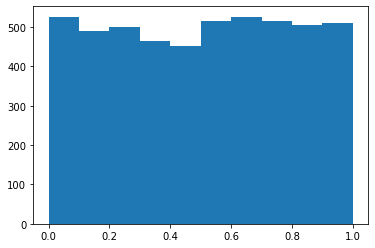

In [11]:
uniform_dist = np.random.uniform(0, 1, size=5000)
plt.hist(uniform_dist)

Сгенерируем большое количество выборок из этого распределения, возьмем для каждой из них среднее и из средних построим гистограмму.

Какое распределение напоминает?

(array([ 20.,  44.,  63.,  79., 107., 131., 136., 181., 173., 180., 240.,
        273., 299., 303., 281., 328., 295., 250., 237., 230., 230., 217.,
        169., 157., 101.,  94.,  72.,  51.,  43.,  16.]),
 array([0.00701943, 0.03991413, 0.07280883, 0.10570353, 0.13859823,
        0.17149293, 0.20438763, 0.23728233, 0.27017703, 0.30307173,
        0.33596643, 0.36886113, 0.40175583, 0.43465053, 0.46754523,
        0.50043993, 0.53333463, 0.56622933, 0.59912403, 0.63201874,
        0.66491344, 0.69780814, 0.73070284, 0.76359754, 0.79649224,
        0.82938694, 0.86228164, 0.89517634, 0.92807104, 0.96096574,
        0.99386044]),
 <BarContainer object of 30 artists>)

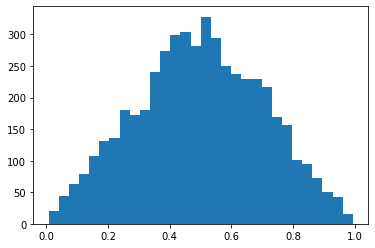

In [12]:
n = 2
sample = np.random.uniform(0, 1, size=(5000, n))
mean = sample.mean(axis=1)
plt.hist(mean, bins=30)

Возьмем любое другое распределение (например, биномиальное)

При каком n распределение стабильно выглядит как нормальное?

(array([  2.,   3.,  19.,  73., 157., 244., 400., 780., 702., 699., 625.,
        674., 288., 161.,  91.,  59.,  12.,   7.,   3.,   1.]),
 array([0.45  , 0.4825, 0.515 , 0.5475, 0.58  , 0.6125, 0.645 , 0.6775,
        0.71  , 0.7425, 0.775 , 0.8075, 0.84  , 0.8725, 0.905 , 0.9375,
        0.97  , 1.0025, 1.035 , 1.0675, 1.1   ]),
 <BarContainer object of 20 artists>)

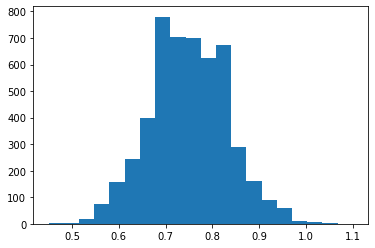

In [17]:
n = 100
sample = np.random.binomial(15, 0.05, size=(5000, n)).mean(axis=1)
plt.hist(sample, bins=20)

Центральная предельная теорема позволяет привести любое распределение к нормальному.

С помощью ЦПТ можно строить доверительный интервалы для любого распределения

## Задача

Для бета-распределения с параметрами `a=1` и `b=0.1`, найти $n$, для которого распределение средних значений выборок будет похоже на нормальное.

Бета-распределение генерируется функцией `np.random.beta(a, b)`

(array([  1.,   0.,   1.,   5.,   9.,  41.,  96., 178., 338., 495., 777.,
        789., 831., 614., 420., 244., 111.,  39.,   9.,   2.]),
 array([0.87849436, 0.8811221 , 0.88374983, 0.88637757, 0.88900531,
        0.89163305, 0.89426079, 0.89688852, 0.89951626, 0.902144  ,
        0.90477174, 0.90739948, 0.91002721, 0.91265495, 0.91528269,
        0.91791043, 0.92053816, 0.9231659 , 0.92579364, 0.92842138,
        0.93104912]),
 <BarContainer object of 20 artists>)

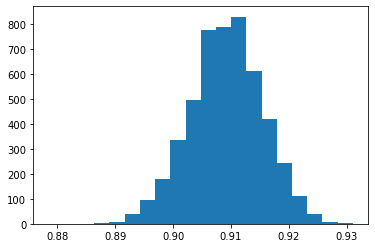

In [22]:
# Ваш код здесь
n = 1000
sample = np.random.beta(1, 0.1, size=(5000, n)).mean(axis=1)
plt.hist(sample, bins=20)

## Основы статистики

**Генеральная совокупность** - совокупность всех объектов исследования

**Выборка** - подмножество генеральной совокупности

**Репрезентативная выборка** - выборка, по которой можно сделать выводы, которые будут верны для генеральной совокупности

**Статистика** - наука о том, как сделать правильные выводы о генеральной совокупности, исходя из выборки. 

Например, цель исследования - определить средний рост мужчин на планете Земля.

Какие выборки будут репрезентативными?

- Выборка из 6 мужчин - по одному мужчине на каждый материк
- Выборка из 1000 мужчин, в которой 800 мужчин из России, а остальные 200 из случайных стран мира
- Выборка из 100 тысяч мужчин, в которой представлены мужчины всех рас и из всех стран в примерно одинаковом количестве, без указания возраста
- Выборка из миллиона случайных людей, без указания пола, возраста, расы и географического положения

## [Доверительные интервалы](https://mse.msu.ru/wp-content/uploads/2020/03/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F-5-%D0%B4%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB%D1%8B.pdf)

Иногда мы хотим не только оценить среднее выборки, но и понять в каком интервале это значение может меняться с заданным уровнем значимости.

Например, мы знаем историю по продажам магазина за год и хотим узнать сколько в среднем продаж в месяц совершает магазин. 

Помимо самого числа нам хотелось бы знать с вероятностью, например, 95%, в каком интервале может меняться это значение.

### Вариант 1. Настоящая дисперсия известна

Настоящая дисперсия может быть известна, если мы проверили статистическую гипотезу и доказали это.

Оценка получится довольно точной

In [23]:
mean = 100
std = 10 # Настоящее среднеквадратичное отклонение
alpha = 0.05
n = 12

In [24]:
from scipy.stats import norm

def get_confidence_interval(mean, std, n, alpha):
    h = norm.ppf(1 - alpha / 2) * std / np.sqrt(n)
    return mean - h, mean + h

confidence_interval = get_confidence_interval(mean, std, n, alpha)

confidence_interval

(94.34207132961915, 105.65792867038085)

### Вариант 2. Настоящая дисперсия неизвестна

Здесь std - среднеквадратичное отклонение, которое мы могли посчитать по данным

Оценка получится менее точной

In [47]:
from scipy.stats import t

t.interval(1 - alpha, n - 1, loc=mean, scale=std / np.sqrt(n))

(93.64630312671869, 106.35369687328131)

В этом случае мы используем T-распределение Стьюдента, которое похоже на нормальное распределение. 

![student](../images/student_t_distr.png)

На картинке параметр $v$ - количество степеней свободы распределения. Если устремим к бесконечности, то получим нормальное распределение.

## Проверка гипотез

Алгоритм проверки статистических гипотез:

- Формулируем гипотезы H0 и H1
- Выбираем уровень значимости
- Определяем статистический критерий
- Рассчитываем критерий
- Принимаем решение

### Шаг 1. Формулируем гипотезы

Обычно формулируются две взаимоисключающие гипотезы. 

Гипотеза $H_0$ принимается за базовую (как было до нашего вмешательства, например). Альтернативная гипотеза $H_1$ показывает то, чего мы хотим достичь или что хотим доказать. 

Основные статистические тесты придумали до нас, нам остается только их правильно применить и не допустить ошибок в интерпретации.

Например:

- $H_0$: матожидание величины $F$ равно $a$
- $H_1$: матожидание не равно $a$/больше $a$/меньше $a$

Или:

- $H_0$: Распределение $G$ - нормальное
- $H_1$: Распределение принадлежит другому классу

Или:

- $H_0$: изменение цвета кнопки не повлияло на действия пользователя
- $H_1$: изменение цвета кнопки изменило количество кликов по ней

Или:

- $H_0$: новое лекарство не влияет на выздоровление пациентов
- $H_1$: с новым лекарством люди выздоравливают от болезни $X$ быстрее

### Шаг 2. Выбираем уровень значимости

Насколько мы хотим быть уверены в результатах теста?

Обычно берут уровень значимости 0.05, и это некий стандарт (вам поверят, что ваш метод работает), но для каждой задачи надо выбирать свой уровень значимости. 


### Ошибки I и II рода
Существует два типа ошибок - ошибки первого и второго рода.

Уровень значимости - вероятность не допустить ошибку первого рода

Какую ошибку "можно" допустить, а какую нельзя?

![type_error](../images/type_error.jpg)


## Задача 

Человечество изобрело лекарство от рака! Клинические тесты показали, что оно действует с уровнем значимости 0.05, но у лекарства очень плохие побочные эффекты. 

Первая партия лекарства составила 50 млн ампул.

Сколько людей можно было бы спасти, если бы проводимый тест был с уровнем значимости 0.01?

In [ ]:
# Ваш код здесь


### Шаг 3. Определяем статистический критерий

Существует множество статистических критериев, которые позволяют каким-то образом оценить по данным эксперимента его результат.

Критерий выбирается от задачи, их существует большое множество, [на википедии можно посмотреть самые основные](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9)

Скорее всего, нужный вам критерий есть в scipy.

Если в scipy нет нужного критерия, то он есть в другой python-библиотеке

![critical_area](../images/critical_area.png)

### Шаг 4. Рассчитываем критерий

Находим критическую область, находим значение статистического критерия для наших данных

## Задача

Реализовать функцию для подсчета одновыборочного t-критерия Стьюдента

## $T = \frac{a - a_0}{\sigma / \sqrt{df}}$

$df$ - количество степеней свободы и равно $n - 1$

In [526]:
def t_stat(sample_mean, a0, std, df):
    # Ваш код здесь
    pass

### Шаг 5. Принимаем решение

Если значение критерий входит в критическую область, отклоняем гипотезу $H_0$ и принимаем $H_1$.

Если лежит не в критической области, то не можем отклонить $H_0$

## Пример

Дана выборка с ростом людей. Известно, что рост людей (генеральной совокупности) распределен нормально. Проверить, равен ли средний рост людей 170 с уровнем значимости 0.05.

Применим [t-критерий Стьюдента](https://ru.wikipedia.org/wiki/T-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0).

$H_0: a = a_0$

$H_1: a \neq a_0 $

In [493]:
n = 100
alpha = 0.05
real_e = 170
real_d = 10
a0 = 170
sample = np.random.normal(real_e, real_d, size=n)

In [520]:
# считаем статистику по данным
statistic = t_stat(sample.mean(), a0, sample.std(), n - 1)

# критическая область считается для распределения стьюдента
critical_value = t.ppf(1 - alpha / 2, n - 1)

if abs(statistic) < critical_value:
    print('H0 справедлива')
else:
    print('H1 справедлива')

H0 справедлива


Посчитаем p-value

In [522]:
p0 = t.cdf(statistic, n - 1) # Левосторонняя альтернатива
p1 = 1 - t.cdf(statistic, n - 1) # Правосторонняя альтернатива
p_value = 2 * min(p0, p1) # Двусторонняя альтернатива
p_value

0.4736557003779305

Проделаем тоже самое с помощью scipy

In [514]:
result = scipy.stats.ttest_1samp(sample, 170)
result

Ttest_1sampResult(statistic=0.7192917229001672, pvalue=0.4736557003779305)

In [502]:
result.statistic, result.pvalue

(0.7192917229001672, 0.4736557003779305)

## Задача

Сгенерировать две выборки роста людей с одинаковыми дисперсиями и разными матожиданиями (из нормального распределения). 

Опровергнуть гипотезу $H_0$ о том, что матожидания этих распределений равны.

Для решения можно использовать `scipy.stats.ttest_ind`.

Важно: тест работает только для распределений с равными дисперсиями. Можно поставить разные дисперсии и одинаковые матожидания и посмотреть на результаты.

In [524]:
# Ваш код здесь


## Проверка на нормальность

Проверить распределение на нормальность можно многими способами. Например, при помощи статистических тестов (их существует очень много, но чаще всего используют критерий Шапиро)

Также используют QQ-график (qq plot). Это неформальный тест, но очень наглядный. Если график похож на линию $y=x$, то выборка из нормального распределение. Если график не похож на прямую линию, то распределение не нормальное.

## Задача

Взять данные о погоде (`../data/weather.csv`), построить гистограмму первых разностей. Похоже ли распределение на нормальное?

Проверить на нормальность распределение первых разностей температуры.

Использовать уровень значимости 0.05. Использовать критерий Шапиро для проверки на нормальность. Функцию найти в интернете

Построить qq plot

In [527]:
# Ваш код здесь


# Домашняя работа

Для задач Easy и Normal использовать данные Титаника

## Easy

Оценить с помощью доверительных интервалов:
- выживаемость всех пассажиров (оценить среднее по isSurvived)
- выживаемость женщин
- выживаемость людей с каютами первого класса

Ответить на вопросы:
- какой вариант оценки доверительных интервалов нужно использовать в данной задаче и почему?
- какая из ошибок более критична для данной задачи - I или II рода?

## Normal

- Проверить гипотезу о том, что женщины выживают чаще мужчин с уровнем значимости 0.05
- Проверить гипотезу о том, что дети выживают чаще, чем взрослые

## Hard

Одной из важнейших тем в статистике является множественная проверка гипотез. 

Если нужно много раз проверять гипотезы, то вероятность совершить ошибку первого рода будет расти с каждой новой гипотезой.

[Прочитать подробнее можно здесь](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BF%D1%80%D0%B0%D0%B2%D0%BA%D0%B0_%D0%BD%D0%B0_%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%83%D1%8E_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D1%83_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7)

Задача:

Мы отобрали 1000 человек, которые заявляют, что они экстрасенсы. Мы хотим проверить это. Для этого проводится следующий эксперимент. Перед каждым участником выкладывают 10 карт рубашкой вверх и просят угадать цвет карты (красный или черный). На уровне значимости 0.01 мы хотим быть уверены, является ли человек экстрасенсом.

Нужно смоделировать ситуацию двумя способами (предполагаем, что экстрасенсов не существует и решения участников представляют из себя биномиальное распределение):

- без множественной проверки гипотез, выявить количество экстрасенсов
- с множественной проверкой гипотез, используя поправку Бонферрони (правило FWER)

Сколько экстрасенсов получилось поймать в каждом из случаев?
